# 01 - Data Loading & Overview

---

## Problem Statement

### Business Context
**IEEE-CIS Fraud Detection** is a Kaggle competition aimed at detecting fraudulent transactions in e-commerce. The dataset is provided by **Vesta Corporation**, one of the world's largest payment processors.

### Problem Definition
**Objective**: Predict the probability that a transaction is **fraudulent** based on transaction data and identity information.

- **Input**: Transaction data (amount, product, card info, device, etc.)
- **Output**: Fraud probability (0.0 - 1.0)
- **Type**: Binary Classification (Supervised Learning)
- **Metric**: ROC-AUC Score

### Business Impact
| Scenario | Impact |
|----------|--------|
| **False Negative** (Missed Fraud) | Financial loss, customer trust damage |
| **False Positive** (False Alarm) | Customer friction, declined legitimate transactions |
| **True Positive** (Caught Fraud) | Saved money, protected customer |

### Challenges
1. **Highly Imbalanced**: Only approximately 3.5% of transactions are fraudulent
2. **High Dimensionality**: 400+ features
3. **Many Missing Values**: Identity data has only 25% coverage
4. **Anonymous Features**: V1-V339 have no description
5. **Temporal Data**: TransactionDT is in seconds, not datetime format

### Success Criteria
- **Kaggle Leaderboard**: AUC > 0.90 (bronze), > 0.93 (silver), > 0.95 (gold)
- **Business**: Minimize fraud loss while maintaining good customer experience

---

## Notebook Objectives
- Understand the structure of the IEEE Fraud Detection dataset
- Load data efficiently (using parquet format)
- Explore basic statistics
- Understand column groups and feature categories

---

## IEEE-CIS Fraud Detection Dataset

This dataset is provided by Vesta Corporation, a payment processing company.

**Files:**
- `train_transaction.parquet` - Training transactions (approximately 590K rows)
- `train_identity.parquet` - Identity information (approximately 144K rows, only 25% of transactions)
- `test_transaction.parquet` - Test transactions
- `test_identity.parquet` - Test identity information

**Target Variable:**
- `isFraud` = 1 if the transaction is fraudulent, 0 otherwise

**Note**: Not all transactions have corresponding identity information. The identity table covers only about 25% of total transactions, as this data is optional and depends on the payment method and verification process used.

In [5]:
## IMPORT LIBRARY
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

#setting
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_row',100)
plt.style.use('seaborn-v0_8-whitegrid')

#DATA PATH
DATA_DIR = Path('../data/raw')

print("succes")

succes


## LOAD DATASET

In [7]:
# load transcation data

train_trans = pd.read_parquet(DATA_DIR /'train_transaction.parquet')

train_ident = pd.read_parquet(DATA_DIR / 'train_identity.parquet')

print("Data loaded")
print(f'Transaction : {train_trans.shape[0]:,} rows x {train_trans.shape[1]:,} columns')
print(f'Transaction : {train_ident.shape[0]:,} rows x {train_ident.shape[1]:,} columns')

Data loaded
Transaction : 590,540 rows x 394 columns
Transaction : 144,233 rows x 41 columns


In [43]:
# memory usage 
def get_memory(df):
    """Get dataframe memory usage in MB"""
    return df.memory_usage(deep=True).sum() / 1024**2

trans_mem = get_memory(train_trans)
ident_mem = get_memory(train_ident)

print("memory usage : ")
print(f"Transaction : {trans_mem:.1f} MB")
print(f"Identity : {ident_mem:.1f}MB")
print(f"Total : {trans_mem + ident_mem:.1f}MB")

memory usage : 
Transaction : 861.1 MB
Identity : 16.2MB
Total : 877.3MB


## DATA OVERVIEW

In [44]:
# TRANSCARION DATA
train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# COLUMNS GROUPS

columns = train_trans.columns.tolist()

# identify columns groups
col_groups = {
    'Target & ID' : ['TransactionID', 'IsFraud', 'TransactionDT', 'TransactionAmt'],
    'Product' : [c for c in columns if c.startswith('ProductCD')],
    'Card' : [c for c in columns if c.startswith('card')],
    'Address' : ['addr1', 'addr2', 'dist1', 'dist1'],
    'Email' : [c for c in columns if 'email' in c.lower()],
    'Count' : [c for c in columns if c.startswith('C') and c[1:].isdigit()],
    'TimeDelta' : [c for c in columns if c.startswith('D') and c[1:].isdigit()],
    'Match' : [c for c in columns if c.startswith('M') and c[1:].isdigit()],
    'Vesta' : [c for c in columns if c.startswith('V') and c[1:].isdigit()]    
}

print("Columns groups:")
for group, cols in col_groups.items():
    print(f'   {group}: {len(cols)} columns')

Columns groups:
   Target & ID: 4 columns
   Product: 1 columns
   Card: 6 columns
   Address: 4 columns
   Email: 2 columns
   Count: 14 columns
   TimeDelta: 15 columns
   Match: 9 columns
   Vesta: 339 columns


Target Distribution
Not froud (0) : 569,877 (96.50%)
Fraud (1) 20,663 (96.50%)


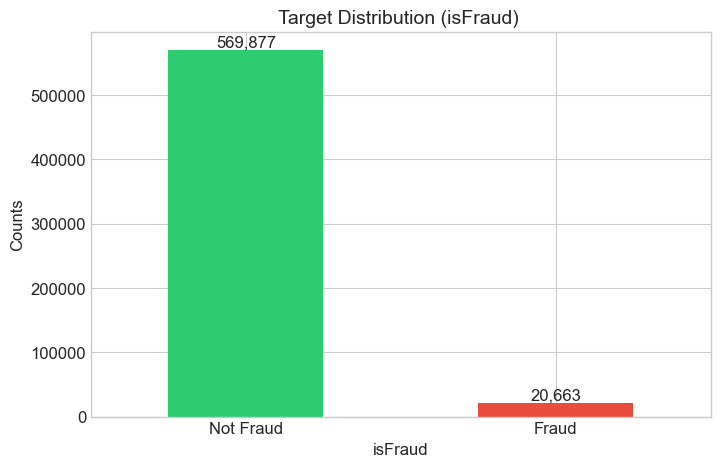

In [64]:
# TARGET DISTRIBUTION

fraud_counts = train_trans['isFraud'].value_counts()
fraud_pct = train_trans['isFraud'].mean() * 100

print('Target Distribution')
print(f'Not froud (0) : {fraud_counts[0]:,} ({100 - fraud_pct:.2f}%)')
print(f'Fraud (1) {fraud_counts[1]:,} ({100 - fraud_pct:.2f}%)')

# visualize
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#2ecc71', '#e74c3c']
fraud_counts.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Target Distribution (isFraud) ', fontsize=14)
ax.set_xlabel('isFraud')
ax.set_ylabel('Counts')
ax.set_xticklabels(['Not Fraud', 'Fraud'], rotation=0)

for i, v in enumerate(fraud_counts):
    ax.text(i, v + 5000, f'{v:,}', ha='center')